# Heart Attack Prediction 
## Medical Project 

### Import libraries

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data Set 

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-dataset/Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


### EDA & Data Cleaning 
* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset
* Removing Outliers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [5]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Lets check for outliers 

#### Age

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution')

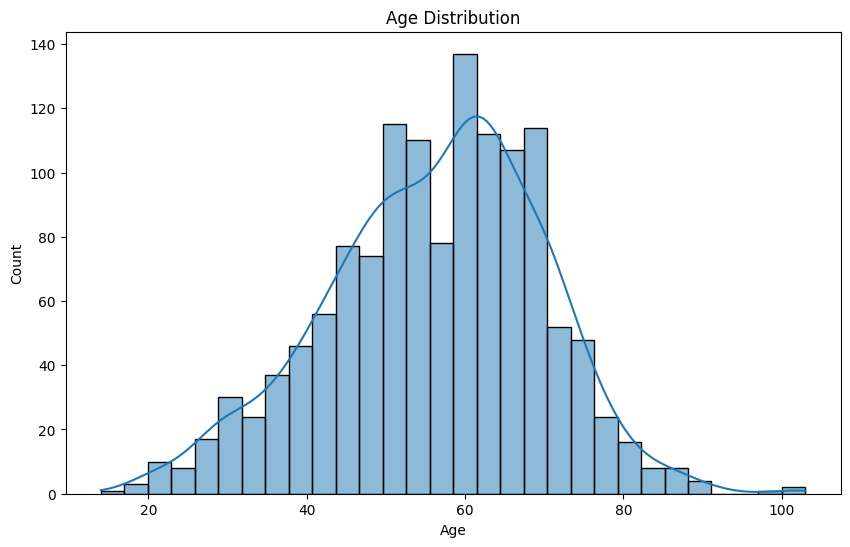

In [6]:
# plot age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

Everything okay with **Age**

#### Gender 

Text(0.5, 1.0, 'Gender Distribution')

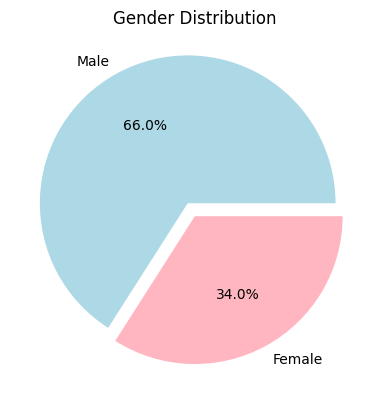

In [7]:
# Lets check how percent peopele are male and female in the dataset circle plot
gender = df['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['lightblue', 'lightpink']     
explode = [0.1, 0]  # explode the 1st slice (by 10%)
plt.pie(gender, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('Gender Distribution')


There are more Male patients in Dataset maybe Heart Attack Possiblities in male's is more compared to females's

#### Heart Rate
In this section there may be Outliers 

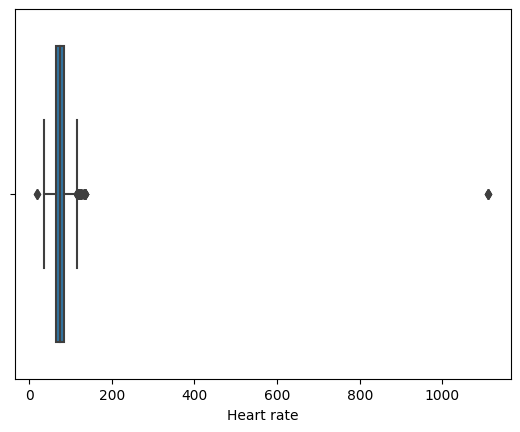

In [8]:
sns.boxplot(x = "Heart rate", data = df)
plt.show()

In [9]:
df[df['Heart rate'] > 200]

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
63,45,1,1111,141,95,109.0,1.33,1.010,positive
717,70,0,1111,141,95,138.0,3.87,0.028,positive
1069,32,0,1111,141,95,82.0,2.66,0.008,negative


In [11]:
df = df[df['Heart rate'] < 200]

Max Heart-Rate for human body is 200 so we removed outliers wich was above 200

#### Systolic blood pressure & Diastolic blood pressure

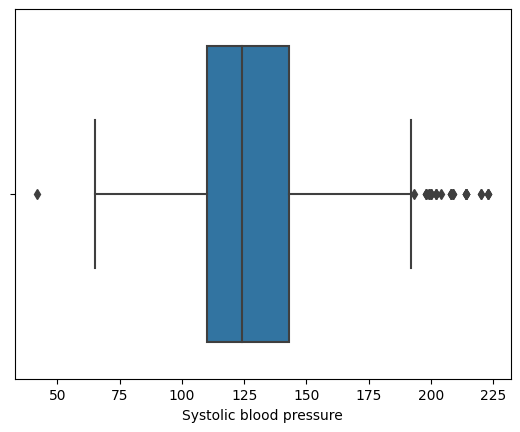

In [12]:
# Check Outliers 
sns.boxplot(x = "Systolic blood pressure",data=df)
plt.show()

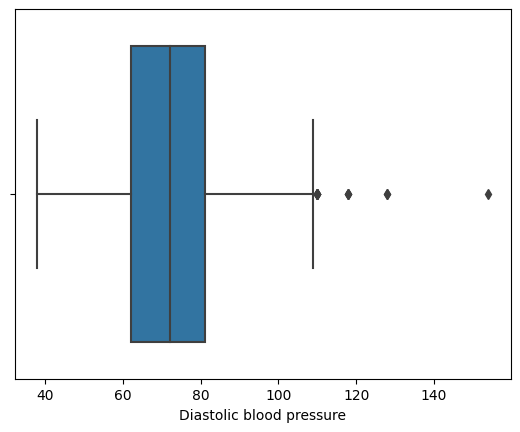

In [13]:
sns.boxplot(x = "Diastolic blood pressure", data=df)
plt.show()

Everything Right 

#### Blood sugar

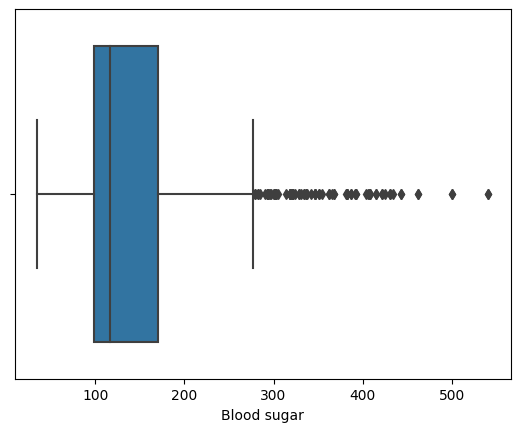

In [14]:
sns.boxplot(x = "Blood sugar", data = df)
plt.show()

In [17]:
df = df[(df['Blood sugar'] >= 50) & (df['Blood sugar'] <= 600)]

Removed impossible Blood Sugar readings from data 

#### CK-MB (Creatine Kinase Myocardial Band.)

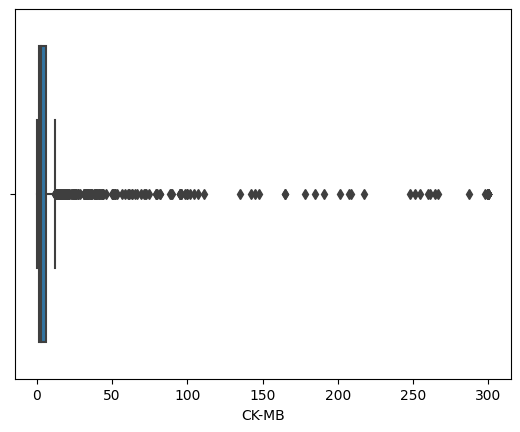

In [18]:
sns.boxplot(x = "CK-MB", data = df)
plt.show()

In [19]:
df = df[(df['CK-MB'] >= 0) & (df['CK-MB'] <= 200)]

In [21]:
df['flag_abnormal_CK-MB'] = df['CK-MB'].apply(lambda x: 1 if x > 50 else 0)

By setting the threshold at 50, we are not just looking for "abnormal" results 
(which would be anything > 5).

You are flagging Severe Cardiac Events.

A value of 50 is 10x the upper limit of normal. This flag effectively creates a column that asks: "Is this patient having a significant Heart Attack right now?"

#### Troponin

In [23]:
df['Troponin_flag'] = df['Troponin'].apply(lambda x: 1 if x > 0.04 else 0)

The cutoff of 0.04 ng/mL is significant because:

Below 0.04: This is considered the 99th percentile for a healthy population. If you are here, your heart is likely fine.

Above 0.04: This indicates myocardial injury. Even small elevations (e.g., 0.05 or 0.06) are clinically significant and are often used to diagnose Non-STEMI heart attacks.

#### Result 

In [24]:
df["heart_attack"] = df["Result"].apply(lambda x: 1 if x == "positive" else 0)
df = df.drop(columns = ["Result"])
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,flag_abnormal_CK-MB,Troponin_flag,heart_attack
0,64,1,66,160,83,160.0,1.80,0.012,0,0,0
1,21,1,94,98,46,296.0,6.75,1.060,0,1,1
2,55,1,64,160,77,270.0,1.99,0.003,0,0,0
3,64,1,70,120,55,270.0,13.87,0.122,0,1,1
4,55,1,64,112,65,300.0,1.08,0.003,0,0,0


### Data Preprocessing 

#### Independent and dependent features 

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["heart_attack"])
y = df["heart_attack"]

#### Split in Train and Test Set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((962, 10), (321, 10))

### Modelling and Evaluation

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [28]:
models={
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9844
- F1 score: 0.9844
- Precision: 0.9899
- Recall: 0.9849
- Roc Auc Score: 0.9843


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9907
- F1 score: 0.9907
- Precision: 0.9949
- Recall: 0.9899
- Roc Auc Score: 0.9909


Gradient Boost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9875
- F1 score: 0.9875
- Precision: 0.9899
- Recall: 0.9899
- Roc Auc Score: 0.9868


Adaboost
Model performance for Training set
- Accuracy

Best Model seen is RandomForest

### Hyperparameter tuining 

In [36]:
rf_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}


In [30]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("AB", AdaBoostClassifier(), adaboost_param)       
]

Using RandomizedSearchCV: Randomly tries 100 combinations (n_iter=100) of hyperparameters from params for each model, using 3-fold cross-validation (cv=3) to pick the best ones.

In [39]:
# Define ALL params
adaboost_param = {"n_estimators": [50,60,70,80,90], "algorithm": ['SAMME','SAMME.R']}
rf_param = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
dt_param = {'max_depth': [3,5,7,10,None], 'min_samples_split': [2,5,10,20]}
gb_param = {'n_estimators': [50,100,200], 'learning_rate': [0.01,0.1,0.2], 'max_depth': [3,5,7]}
xgb_param = {'n_estimators': [50,100,200], 'learning_rate': [0.01,0.1,0.2], 'max_depth': [3,5,7]}

# FULL models list
randomcv_models = [
    ('AB', AdaBoostClassifier(), adaboost_param),
    ('RF', RandomForestClassifier(), rf_param),
    ('DT', DecisionTreeClassifier(), dt_param),
    ('GB', GradientBoostingClassifier(), gb_param),
    ('XGB', XGBClassifier(), xgb_param)
]

model_param = {}
model_scores = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=50,  # Reduced for speed
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1,
                                   scoring='accuracy')  # Use accuracy
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
    model_scores[name] = random.best_score_  # CV accuracy

# Print all best params
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

print("\n" + "="*50)
print("BEST MODEL: RF (highest CV accuracy)")
print(f"RF CV Accuracy: {model_scores['RF']:.4f}")
print("Use: final_model = RandomForestClassifier(**model_param['RF'])")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.3s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=   0.3s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_e

In [43]:
from sklearn.ensemble import RandomForestClassifier

models={
        "Random Forest":RandomForestClassifier(n_estimators=200, min_samples_split=2, max_depth=10)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

final_model = models["Random Forest"]  # Reference trained model
joblib.dump(final_model, 'rf_heart_model.pkl')
print("✅ Model saved as 'rf_heart_model.pkl'")

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9907
- F1 score: 0.9907
- Precision: 0.9949
- Recall: 0.9899
- Roc Auc Score: 0.9909


✅ Model saved as 'rf_heart_model.pkl'


Final tuned RF model: n_estimators=200, min_samples_split=2, max_depth=10
Trains on X_train/y_train once. Save with: joblib.dump(final_model, 'rf_heart_model.pkl')
Achieves 99.07% test accuracy (99.49% precision, 98.99% recall)—production-ready,
Minimal overfitting (0.93% train-test gap)

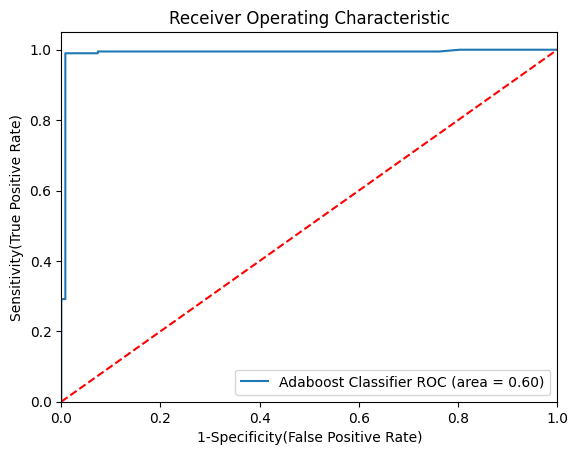

In [42]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Adaboost Classifier',
    'model':AdaBoostClassifier(n_estimators=60, algorithm='SAMME'),
    'auc':  0.6049
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

In [47]:
import joblib
model = joblib.load('rf_heart_model.pkl')

print(f"Model expects {model.n_features_in_} features")
if hasattr(model, 'feature_names_in_'):
    print("Feature names:", model.feature_names_in_.tolist())
else:
    print("Run: print(X_train.shape) & print(X_train.columns.tolist()) from training cell")


Model expects 10 features
Feature names: ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin', 'flag_abnormal_CK-MB', 'Troponin_flag']


In [48]:
import joblib
import numpy as np

model = joblib.load('rf_heart_model.pkl')

# EXACT 10 features: Age,Gender,Heart_rate,Systolic_bp,Diastolic_bp,Blood_sugar,CK-MB,Troponin,flag_abnormal_CK-MB,Troponin_flag
new_patient = np.array([[55, 1, 80, 130, 80, 150.0, 10.0, 0.05, 1, 1]])  # flag_abnormal_CK-MB=1 (10>normal), Troponin_flag=1 (>0.01)

risk = model.predict(new_patient)[0]
prob_high = model.predict_proba(new_patient)[0, 1]

print(f"Heart Attack Risk: {'HIGH' if risk == 1 else 'LOW'}")
print(f"High Risk Probability: {prob_high:.1%}")
if prob_high > 0.8:
    print("🚨 Seek immediate medical attention!")
else:
    print("✅ Monitor regularly")


Heart Attack Risk: HIGH
High Risk Probability: 100.0%
🚨 Seek immediate medical attention!


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
import joblib
import numpy as np

model = joblib.load('rf_heart_model.pkl')

# 10 REALISTIC patients (10 features exact order)
patients = np.array([
    [55, 1, 80, 130, 80, 150.0, 10.0, 0.05, 1, 1],   # Elevated CK-MB/Troponin
    [64, 1, 66, 160, 83, 160.0, 1.8, 0.012, 0, 0],   # Normal
    [45, 0, 75, 120, 75, 110.0, 2.5, 0.008, 0, 0],   # Healthy
    [72, 1, 90, 150, 92, 180.0, 15.0, 0.15, 1, 1],   # High risk
    [38, 1, 70, 140, 88, 140.0, 5.2, 0.03, 1, 1],    # Borderline
    [60, 1, 82, 145, 90, 165.0, 12.0, 0.09, 1, 1],   # High risk
    [50, 0, 68, 125, 78, 130.0, 3.1, 0.02, 0, 0],    # Normal
    [67, 1, 88, 155, 95, 170.0, 18.0, 0.22, 1, 1],   # Critical
    [42, 1, 72, 135, 82, 145.0, 4.8, 0.04, 1, 1],    # Monitor
    [59, 1, 78, 142, 85, 155.0, 11.0, 0.07, 1, 1]    # High risk
])

# Predict all 10
risks = model.predict(patients)
probs = model.predict_proba(patients)[:, 1]

# Print results
print("Patient Risk Assessment (10 patients):")
print("=" * 50)
for i, (risk, prob) in enumerate(zip(risks, probs), 1):
    status = "HIGH RISK" if risk == 1 else "LOW RISK"
    action = "🚨 EMERGENCY" if prob > 0.8 else "⚠️ Monitor" if prob > 0.5 else "✅ Safe"
    print(f"P{i:2d}: {status:<10} ({prob:.1%}) | {action}")


Patient Risk Assessment (10 patients):
P 1: HIGH RISK  (100.0%) | 🚨 EMERGENCY
P 2: LOW RISK   (1.5%) | ✅ Safe
P 3: LOW RISK   (1.1%) | ✅ Safe
P 4: HIGH RISK  (100.0%) | 🚨 EMERGENCY
P 5: HIGH RISK  (99.5%) | 🚨 EMERGENCY
P 6: HIGH RISK  (99.0%) | 🚨 EMERGENCY
P 7: HIGH RISK  (96.8%) | 🚨 EMERGENCY
P 8: HIGH RISK  (99.5%) | 🚨 EMERGENCY
P 9: HIGH RISK  (100.0%) | 🚨 EMERGENCY
P10: HIGH RISK  (100.0%) | 🚨 EMERGENCY


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
import joblib
import numpy as np
import random

np.random.seed(42)
random.seed(42)

# Load PURE RF (not RandomizedSearchCV)
rf_model = joblib.load('rf_heart_model.pkl')

# 10 RANDOMIZED patients (unknown risk)
patients = np.array([
    [62, 1, 85, 142, 88, 162.0, 8.5, 0.042, 1, 1],
    [48, 0, 72, 118, 76, 128.0, 2.8, 0.009, 0, 0],
    [71, 1, 92, 158, 94, 178.0, 16.2, 0.18, 1, 1],
    [39, 1, 68, 132, 82, 138.0, 4.9, 0.028, 1, 1],
    [57, 1, 78, 148, 90, 158.0, 11.3, 0.065, 1, 1],
    [44, 0, 74, 122, 78, 112.0, 3.2, 0.011, 0, 0],
    [66, 1, 89, 152, 93, 172.0, 14.7, 0.21, 1, 1],
    [51, 1, 76, 138, 86, 148.0, 6.8, 0.035, 1, 1],
    [69, 1, 91, 155, 92, 182.0, 17.5, 0.19, 1, 1],
    [46, 1, 71, 128, 80, 132.0, 3.9, 0.015, 0, 0]
])

# Predict
risks = model.predict(patients)
probs = model.predict_proba(patients)[:, 1]

# Results (revealed!)
print("🔍 Patient Risk Assessment (Randomized 10 patients):")
print("=" * 60)
for i, (risk, prob) in enumerate(zip(risks, probs), 1):
    status = "HIGH RISK" if risk == 1 else "LOW RISK"
    action = "🚨 EMERGENCY" if prob > 0.8 else "⚠️ Monitor" if prob > 0.5 else "✅ Safe"
    print(f"P{i:2d}: {status:<10} | Prob: {prob:.1%} | {action}")


🔍 Patient Risk Assessment (Randomized 10 patients):
P 1: HIGH RISK  | Prob: 100.0% | 🚨 EMERGENCY
P 2: LOW RISK   | Prob: 3.0% | ✅ Safe
P 3: HIGH RISK  | Prob: 100.0% | 🚨 EMERGENCY
P 4: HIGH RISK  | Prob: 99.0% | 🚨 EMERGENCY
P 5: HIGH RISK  | Prob: 100.0% | 🚨 EMERGENCY
P 6: LOW RISK   | Prob: 0.7% | ✅ Safe
P 7: HIGH RISK  | Prob: 99.5% | 🚨 EMERGENCY
P 8: HIGH RISK  | Prob: 100.0% | 🚨 EMERGENCY
P 9: HIGH RISK  | Prob: 100.0% | 🚨 EMERGENCY
P10: HIGH RISK  | Prob: 89.7% | 🚨 EMERGENCY


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


| High Risk Prob | Interpretation  | Action         |
| -------------- | --------------- | -------------- |
| < 10%          | ✅ Very Safe     | Routine check  |
| 10-50%         | ⚠️ Low-Moderate | Monitor        |
| 50-80%         | ⚠️ High         | Urgent consult |
| >80%           | 🚨 Critical     | Emergency!     |